In [7]:
import random
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [8]:
mask = np.zeros((1600, 256), dtype=np.uint8)
print(type(mask))
cv2.ellipse(mask, (10, 10), (10, 10), 0, 0, 360, 255, -1)

mask = np.zeros((1600, 256, 3), dtype=np.uint8)
print(type(mask[:, :, 2]))
cv2.ellipse(mask[:, :, 2].copy(), (10, 10), (10, 10), 0, 0, 360, 255, -1)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [111]:
def gen_random_image(input_shape, output_shape):
        img = np.zeros(input_shape, dtype=np.uint8)
        mask = np.zeros((input_shape[0], input_shape[1], *output_shape), dtype=np.uint8)

        # Background
        dark_color = np.zeros(shape=(input_shape[2],))
        for i in range(input_shape[2]):
            dark_color[i] = random.randint(0, 100)
            img[:, :, i] = dark_color[i]

        # Object
        light_color = np.zeros(shape=(input_shape[2],))
        for i in range(input_shape[2]):
            light_color[i] = random.randint(dark_color[i] + 1, 255)

        for c in range(10):
            center_0 = random.randint(0, input_shape[0] - 1)
            center_1 = random.randint(0, input_shape[1] - 1)
            r1 = random.randint(10, 56)
            r2 = random.randint(10, 56)
            img = cv2.ellipse(img.copy(), (center_1, center_0), (r2, r1), 0, 0, 360, light_color, -1)
            ax = random.randint(0, output_shape[0] - 1)
            mask[:, :, ax] = cv2.ellipse(mask[:, :, ax].copy(), (center_1, center_0), (r2, r1), 0, 0, 360, 255, -1)

        noise = np.zeros(input_shape, dtype=np.uint8)
        cv2.randn(noise, 50, 25)
        img += noise
        img = np.clip(img, 0, 255)

        return img, mask

In [112]:
img, mask = gen_random_image((256, 1600 , 1), (4,))
print(img.shape)
print(mask.shape)
print(img.min())
print(img.max())

(256, 1600, 1)
(256, 1600, 4)
0
255


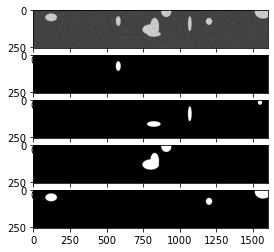

In [113]:
fig, ax = plt.subplots(5, 1)
ax[0].imshow(img, cmap='gray')
for i in range(0, 4):
    ax[i+1].imshow(mask[:, :, i], cmap='gray')
plt.show()